# Identify potential AGN with optical variability

Author: Melissa Graham & Midori Rollins

Identify potential AGN with significant photometric variability using the nightly-epoch light curves.

Write a list of the most variable, most likely candidates to `potential_AGN_list_1.txt`.

## Set up and read in data

All the files have headers which explain the columns.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time

Plotting parameters for nightly-epoch light curves.

In [2]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

### Load the candidate lightcurves

In [3]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

### Load the lightcurve parameters data

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
paramLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
paramLC_tspan = np.loadtxt(fnm, dtype='float', usecols=(2))
paramLC_tspan_g = np.loadtxt(fnm, dtype='float', usecols=(3))
paramLC_tspan_r = np.loadtxt(fnm, dtype='float', usecols=(4))
paramLC_tspan_i = np.loadtxt(fnm, dtype='float', usecols=(5))
paramLC_minmag = np.loadtxt(fnm, dtype='float', usecols=(6))
paramLC_minmag_g = np.loadtxt(fnm, dtype='float', usecols=(7))
paramLC_minmag_r = np.loadtxt(fnm, dtype='float', usecols=(8))
paramLC_minmag_i = np.loadtxt(fnm, dtype='float', usecols=(9))
paramLC_amp = np.loadtxt(fnm, dtype='float', usecols=(10))
paramLC_amp_g = np.loadtxt(fnm, dtype='float', usecols=(11))
paramLC_amp_r = np.loadtxt(fnm, dtype='float', usecols=(12))
paramLC_amp_i = np.loadtxt(fnm, dtype='float', usecols=(13))
paramLC_neps = np.loadtxt(fnm, dtype='int', usecols=(14))
paramLC_neps_g = np.loadtxt(fnm, dtype='int', usecols=(15))
paramLC_neps_r = np.loadtxt(fnm, dtype='int', usecols=(16))
paramLC_neps_i = np.loadtxt(fnm, dtype='int', usecols=(17))
del fnm

### Load the results of cross-matching with DESI Legacy Survey DR10

In [5]:
fnm = '../cross_matched_LSDR10/candidate_xmatch_LSdr10.dat'
lsdr10xm_candid   = np.loadtxt(fnm, dtype='str', usecols=(0))
lsdr10xm_candra   = np.loadtxt(fnm, dtype='float', usecols=(1))
lsdr10xm_canddec  = np.loadtxt(fnm, dtype='float', usecols=(2))
lsdr10xm_flagstar = np.loadtxt(fnm, dtype='int', usecols=(4))
lsdr10xm_flagcore = np.loadtxt(fnm, dtype='int', usecols=(5))
lsdr10xm_flagmatch= np.loadtxt(fnm, dtype='int', usecols=(6))
lsdr10xm_sep      = np.loadtxt(fnm, dtype='float', usecols=(7))
lsdr10xm_ra       = np.loadtxt(fnm, dtype='float', usecols=(8))
lsdr10xm_dec      = np.loadtxt(fnm, dtype='float', usecols=(9))
lsdr10xm_rmag     = np.loadtxt(fnm, dtype='float', usecols=(13))
lsdr10xm_type     = np.loadtxt(fnm, dtype='str', usecols=(15))
lsdr10xm_shaper   = np.loadtxt(fnm, dtype='float', usecols=(19))
lsdr10xm_rpsfsize = np.loadtxt(fnm, dtype='float', usecols=(21))  
lsdr10xm_meanpz   = np.loadtxt(fnm, dtype='float', usecols=(23))
lsdr10xm_stdpz    = np.loadtxt(fnm, dtype='float', usecols=(24))
lsdr10xm_specz    = np.loadtxt(fnm, dtype='float', usecols=(25))
del fnm

Get the index in the cross-match arrays for each candidate in the light curve parameters arrays.

In [6]:
paramLC_xindex = np.zeros(len(paramLC_candid), dtype='int') - 1

for c, cand in enumerate(paramLC_candid):
    tx = np.where(lsdr10xm_candid == cand)[0]
    paramLC_xindex[c] = tx[0]
    del tx

tx = np.where(paramLC_xindex < 0)[0]
print('should be zero if all indexed:', len(tx))
del tx

should be zero if all indexed: 0


### Load the links to the stamps and RK's candidate viewer pages

In [7]:
fnm = '../cross_matched_LSDR10/candidate_links.dat'
link_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
link_lsview = np.loadtxt(fnm, dtype='str', usecols=(1))
link_rkview = np.loadtxt(fnm, dtype='str', usecols=(2))
del fnm

## Identify potential AGN

First, just identify candidates with detections over a long time baseline.

These are not going to be only transients, will also include variable stars.

In [8]:
min_tspan = 720
print('Number of candidates with time span >'+str(min_tspan)+' days in any filter, and all three filters.')
tx1 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan >= min_tspan))[0]
tx2 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan_g >= min_tspan) &
               (paramLC_tspan_r >= min_tspan) & 
               (paramLC_tspan_i >= min_tspan))[0]
print('COSMOS: ', len(tx1), len(tx2))
del tx1, tx2
tx1 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan >= min_tspan))[0]
tx2 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan_g >= min_tspan) &
               (paramLC_tspan_r >= min_tspan) & 
               (paramLC_tspan_i >= min_tspan))[0]
print('ELAIS: ', len(tx1), len(tx2))
del tx1, tx2
print(' ')
del min_tspan

Number of candidates with time span >720 days in any filter, and all three filters.
COSMOS:  3845 88
ELAIS:  263 24
 


Now also impose the constraints that their maximum difference-image magnitude should be brighter than 22 mag,
and that the change in their difference-image magnitude should be greater than 0.5 mag.

Also require they were detected on at least 40 epochs.

These are the bright, photometrically variable, long-term candidates.

In [9]:
min_tspan = 720
max_minmag = 22
min_amp = 0.5
min_neps = 40

print('Number of candidates that meet constraints in any filter, and all three filters.')
tx1 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan >= min_tspan) & 
               (paramLC_minmag <= max_minmag) & 
               (paramLC_amp >= min_amp) & 
               (paramLC_neps >= min_neps))[0]
tx2 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan_g >= min_tspan) & (paramLC_tspan_r >= min_tspan) & (paramLC_tspan_i >= min_tspan) & 
               (paramLC_minmag_g <= max_minmag) & (paramLC_minmag_r <= max_minmag) & (paramLC_minmag_i <= max_minmag) & 
               (paramLC_amp_g >= min_amp) & (paramLC_amp_r >= min_amp) & (paramLC_amp_i >= min_amp) & 
               (paramLC_neps_g >= min_neps) & (paramLC_neps_r >= min_neps) & (paramLC_neps_i >= min_neps))[0]
print('COSMOS: ', len(tx1), len(tx2))
del tx1, tx2
tx1 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan >= min_tspan) & 
               (paramLC_minmag <= max_minmag) & 
               (paramLC_amp >= min_amp) & 
               (paramLC_neps >= min_neps))[0]
tx2 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan_g >= min_tspan) & (paramLC_tspan_r >= min_tspan) & (paramLC_tspan_i >= min_tspan) & 
               (paramLC_minmag_g <= max_minmag) & (paramLC_minmag_r <= max_minmag) & (paramLC_minmag_i <= max_minmag) & 
               (paramLC_amp_g >= min_amp) & (paramLC_amp_r >= min_amp) & (paramLC_amp_i >= min_amp) & 
               (paramLC_neps_g >= min_neps) & (paramLC_neps_r >= min_neps) & (paramLC_neps_i >= min_neps))[0]
print('ELAIS: ', len(tx1), len(tx2))
del tx1, tx2
print(' ')

del min_tspan, max_minmag, min_amp, min_neps

Number of candidates that meet constraints in any filter, and all three filters.
COSMOS:  777 41
ELAIS:  121 11
 


Now use the cross-matches with the DESI Legacy Survey Tractor catalog to identify which of these are 
cross matched to a galaxy and are near the center of that galaxy.

Recall the following definitions from the cross-match.

`flagstar` : 1 if matched to a star; 0 if matched to a galaxy; -1 if unmatched (int) 

`flagcore` : 1 if matched to the core of the galaxy; 0 otherwise (int) 

`flagmatch` : 1 if a star AND galaxy met constraints; 0 if one or the other; -1 if unmatched (int) 


In [10]:
tx = np.where((lsdr10xm_flagcore == 1) & (lsdr10xm_flagstar == 1))[0]
print(len(tx))

tx = np.where((lsdr10xm_flagcore == 1) & (lsdr10xm_flagmatch == 1))[0]
print(len(tx))

0
189


In [11]:
min_tspan = 720
max_minmag = 22
min_amp = 0.5
min_neps = 40

print('Number of candidates that meet constraints in any filter, and all three filters.')
tx1 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan >= min_tspan) & 
               (paramLC_minmag <= max_minmag) & 
               (paramLC_amp >= min_amp) & 
               (paramLC_neps >= min_neps) & 
               (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
tx2 = np.where((paramLC_field == 'COSMOS') & 
               (paramLC_tspan_g >= min_tspan) & (paramLC_tspan_r >= min_tspan) & (paramLC_tspan_i >= min_tspan) & 
               (paramLC_minmag_g <= max_minmag) & (paramLC_minmag_r <= max_minmag) & (paramLC_minmag_i <= max_minmag) & 
               (paramLC_amp_g >= min_amp) & (paramLC_amp_r >= min_amp) & (paramLC_amp_i >= min_amp) & 
               (paramLC_neps_g >= min_neps) & (paramLC_neps_r >= min_neps) & (paramLC_neps_i >= min_neps) & 
               (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
print('COSMOS: ', len(tx1), len(tx2))
del tx1, tx2
tx1 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan >= min_tspan) & 
               (paramLC_minmag <= max_minmag) & 
               (paramLC_amp >= min_amp) & 
               (paramLC_neps >= min_neps) & 
               (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
tx2 = np.where((paramLC_field == 'ELAIS') & 
               (paramLC_tspan_g >= min_tspan) & (paramLC_tspan_r >= min_tspan) & (paramLC_tspan_i >= min_tspan) & 
               (paramLC_minmag_g <= max_minmag) & (paramLC_minmag_r <= max_minmag) & (paramLC_minmag_i <= max_minmag) & 
               (paramLC_amp_g >= min_amp) & (paramLC_amp_r >= min_amp) & (paramLC_amp_i >= min_amp) & 
               (paramLC_neps_g >= min_neps) & (paramLC_neps_r >= min_neps) & (paramLC_neps_i >= min_neps) & 
               (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
print('ELAIS: ', len(tx1), len(tx2))
del tx1, tx2
print(' ')

del min_tspan, max_minmag, min_amp, min_neps

Number of candidates that meet constraints in any filter, and all three filters.
COSMOS:  228 13
ELAIS:  17 2
 


## Plot the light curves for the top AGN-like candidates

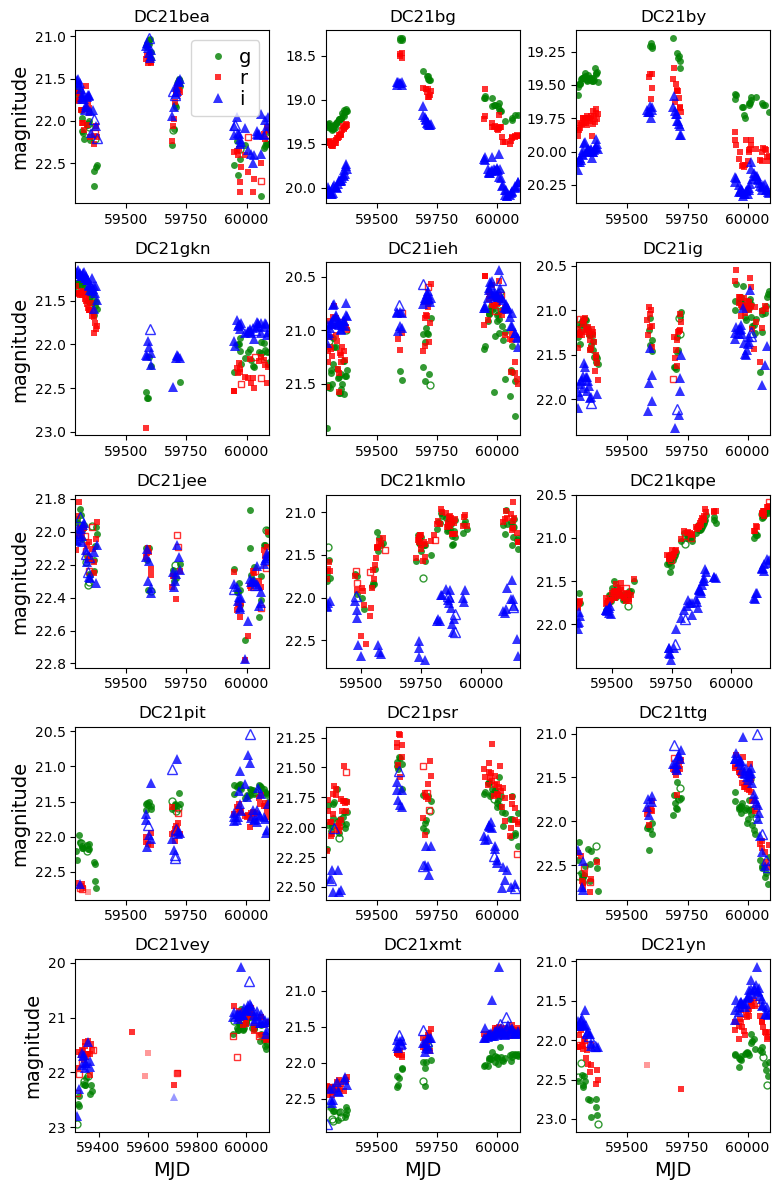

In [12]:
min_tspan = 720
max_minmag = 22
min_amp = 0.5
min_neps = 40
tx = np.where((paramLC_tspan_g >= min_tspan) &
              (paramLC_tspan_r >= min_tspan) & 
              (paramLC_tspan_i >= min_tspan) & 
              (paramLC_minmag_g <= max_minmag) &
              (paramLC_minmag_r <= max_minmag) & 
              (paramLC_minmag_i <= max_minmag) & 
              (paramLC_amp_g >= min_amp) &
              (paramLC_amp_r >= min_amp) & 
              (paramLC_amp_i >= min_amp) & 
              (paramLC_neps_g >= min_neps) &
              (paramLC_neps_r >= min_neps) & 
              (paramLC_neps_i >= min_neps) & 
              (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
del min_tspan, max_minmag, min_amp, min_neps

nrow = 5
ncol = 3
fig, ax = plt.subplots( nrow, ncol, figsize=(8, 12), sharex=False, sharey=False )

x = 0
for i in range(nrow):
    ax[i, 0].set_ylabel('magnitude', fontsize=14)
    for j in range(ncol):
        if x <= len(tx)-1:
            for f,filt in enumerate(all_filters):
                cx0 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
                cx1 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
                cx2 = np.where((candLC_candid == paramLC_candid[tx[x]]) & \
                               (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
                ax[i, j].plot(candLC_mjd[cx0], candLC_mag[cx0], 
                             all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
                ax[i, j].plot(candLC_mjd[cx1], candLC_mag[cx1], 
                             all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
                ax[i, j].plot(candLC_mjd[cx2], candLC_mag[cx2], 
                             all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
                del cx0, cx1, cx2

            cx = np.where((candLC_candid == paramLC_candid[tx[x]]) & (candLC_lef == 0))[0]
            xmin = np.min(candLC_mjd[cx])
            xmax = np.max(candLC_mjd[cx])
            del cx
            ax[i, j].invert_yaxis()
            ax[i, j].set_xlim([xmin-5, xmax+5])
            del xmin, xmax
            ax[i, j].set_title(paramLC_candid[tx[x]])
            x += 1

ax[0, 0].legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(ncol):
    ax[nrow-1, j].set_xlabel('MJD', fontsize=14)

plt.tight_layout()
plt.show()
del tx, x

### Visual review of static-sky stamps

Print the links to the Legacy Survey stamps, and to Rob Knop's candidate viewer pages, for each of the candidates of interest.

In [13]:
min_tspan = 720
max_minmag = 22
min_amp = 0.5
min_neps = 40
tx = np.where((paramLC_tspan_g >= min_tspan) &
              (paramLC_tspan_r >= min_tspan) & 
              (paramLC_tspan_i >= min_tspan) & 
              (paramLC_minmag_g <= max_minmag) &
              (paramLC_minmag_r <= max_minmag) & 
              (paramLC_minmag_i <= max_minmag) & 
              (paramLC_amp_g >= min_amp) &
              (paramLC_amp_r >= min_amp) & 
              (paramLC_amp_i >= min_amp) & 
              (paramLC_neps_g >= min_neps) &
              (paramLC_neps_r >= min_neps) & 
              (paramLC_neps_i >= min_neps) & 
              (lsdr10xm_flagcore[paramLC_xindex] == 1))[0]
del min_tspan, max_minmag, min_amp, min_neps
candidates_of_interest = paramLC_candid[tx]
del tx

print('candidate : flagstar flagcore flagmatch : statick-sky r-band magnitude')
print('stamp link')
print('RK candidate viewer page link')
print(' ')
for c, cand in enumerate(candidates_of_interest):
    tx = np.where(lsdr10xm_candid == cand)[0]
    print(cand, ' : ', lsdr10xm_flagstar[tx[0]], lsdr10xm_flagcore[tx[0]], lsdr10xm_flagmatch[tx[0]], ' : ', np.round(lsdr10xm_rmag[tx[0]], 1) )
    tx = np.where(link_candid == cand)[0]
    print(link_lsview[tx[0]])
    print(link_rkview[tx[0]])
    print(' ')
    del tx

candidate : flagstar flagcore flagmatch : statick-sky r-band magnitude
stamp link
RK candidate viewer page link
 
DC21bea  :  0 1 0  :  20.4
https://www.legacysurvey.org/viewer/cutout.jpg?ra=151.659764786602&dec=1.29986028694842&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21bea
 
DC21bg  :  0 1 0  :  19.3
https://www.legacysurvey.org/viewer/cutout.jpg?ra=148.292256899814&dec=1.59890441919864&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21bg
 
DC21by  :  0 1 0  :  19.2
https://www.legacysurvey.org/viewer/cutout.jpg?ra=148.214713673286&dec=1.64674527989867&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21by
 
DC21gkn  :  0 1 0  :  20.7
https://www.legacysurvey.org/viewer/cutout.jpg?ra=151.529565103094&dec=2.00007486082188&layer=ls-dr9&pixscale=0.06
https://decat-webap.lbl.gov/decatview.py/cand/DC21gkn
 
DC21ieh  :  0 1 0  :  19.6
https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.594452997854&dec=

Of the two candidates that have `flagmatch` = 1, which indicates that the candidate was matched to a galaxy but also a star was nearby enough to be a good match,
only the stamp of DC21xmt makes it look like that candidate might actually be a variable star.

In [14]:
fout = open('potential_AGN_list_1.txt', 'w')
for cand in candidates_of_interest:
    print(cand)
    fout.write(cand+'\n')
fout.close
del candidates_of_interest

DC21bea
DC21bg
DC21by
DC21gkn
DC21ieh
DC21ig
DC21jee
DC21kmlo
DC21kqpe
DC21pit
DC21psr
DC21ttg
DC21vey
DC21xmt
DC21yn


## What to do next?

Are there other ways that AGN scientists typically use optical variability to identify or classify AGN?

Could we do something similar with the data in hand?

Could create additional lists of potential AGN and then characterize them in NB 2.